In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('/home/anirudhkailaje/Documents/01_UPenn/01_ESE5460/02_Homework/dels.pickle', 'rb') as f:
    train_losses, del_ins, del_outs = pickle.load(f)

del_ins = np.log(del_ins)
del_outs = np.log(del_outs)

ns = np.logspace(1, 3, 20).astype(int)
del_ins_medians = np.median(del_ins, axis = 1)
del_outs_mdeians = np.median(del_outs, axis = 1)
del_in_stds = np.std(del_ins, axis = 1)
del_out_stds = np.std(del_outs, axis = 1)

In [2]:
fig, ax1 = plt.subplots()
bp1 = ax1.boxplot(del_ins.T, labels=ns, patch_artist=True)
ax1.set_ylabel('$\delta_{in}(n)$ [in blue], $\delta_{out}(n)$ [in orange] ')
ax1.set_xlabel('$n$')
ax1.tick_params(axis='y', labelcolor = 'lightblue')
ax2 = ax1.twiny()
bp2 = ax1.boxplot(del_outs.T, labels=ns, patch_artist = True)
# ax2.set_ylabel('$\delta_{out}(n)$')
# ax2.tick_params(axis='y', labelcolor = 'orange')
del_ins_medians = np.median(del_ins, axis = 1)
del_outs_mdeians = np.median(del_outs, axis = 1)
ax1.plot(np.arange(20)+1, del_ins_medians)
ax1.plot(np.arange(20)+1, del_outs_mdeians)

for box in bp1['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.35)
for line in bp1['medians']:
    line.set_color('blue')
for box in bp2['boxes']:
    box.set_facecolor('orange')
    box.set_alpha(0.35)
for line in bp2['medians']:
    line.set_color('red')
for circle in bp2['fliers']:
    circle.set_color('red')
plt.show()

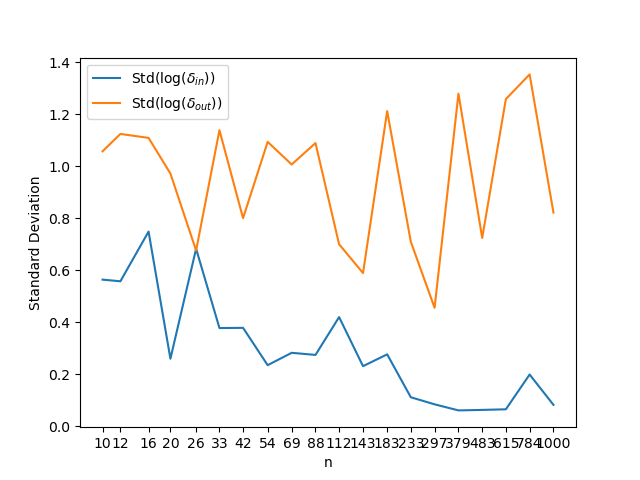

In [3]:
fig = plt.figure()
plt.plot(np.log(ns),del_in_stds, label = 'Std(log($\delta_{in}$))')
plt.plot(np.log(ns), del_out_stds, label = 'Std(log($\delta_{out}$))')
plt.xticks(np.log(ns), [f'{n}' for n in ns])
plt.xlabel('n')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()